In [151]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

In [152]:
# dataset = MNIST(root='data/',download=True)

In [153]:
dataset=MNIST(root='data/',train=True)

In [154]:
len(dataset)

60000

In [155]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [156]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

5


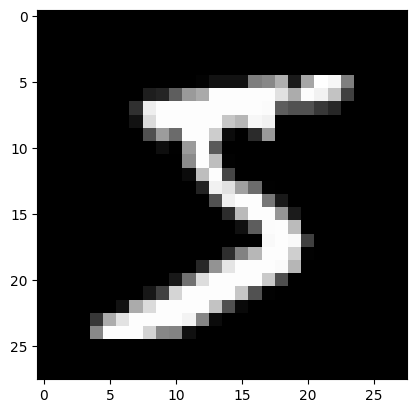

In [158]:
image,label = dataset[0]
plt.imshow(image, cmap='gray')
print(label)

0


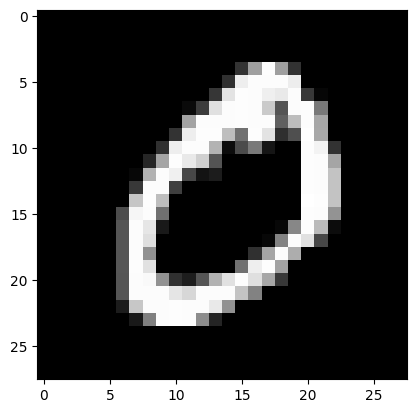

In [159]:
image,label = dataset[1]
plt.imshow(image, cmap='gray')
print(label)

In [160]:
dataset = MNIST(root = 'data/',train = True, transform=transforms.ToTensor())

In [191]:
test_dataset[0]


(<PIL.Image.Image image mode=L size=28x28>, 7)

In [161]:
image_tensor,label = dataset[0]
print(image_tensor.shape,label)


torch.Size([1, 28, 28]) 5


In [162]:
print(image_tensor[0,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


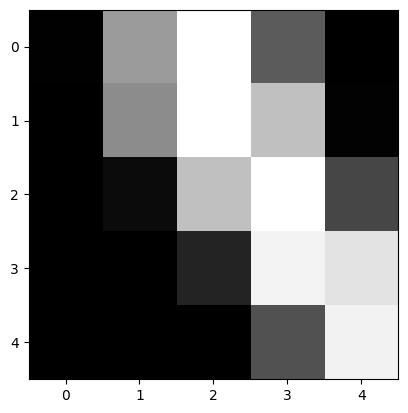

In [163]:
plt.imshow(image_tensor[0,10:15,10:15],cmap='gray')


In [164]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [165]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [166]:
import torch.nn as nn 
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [167]:
print(model.weight.shape, model.bias.shape)


torch.Size([10, 784]) torch.Size([10])


In [168]:
model.weight

Parameter containing:
tensor([[-0.0053, -0.0235,  0.0339,  ...,  0.0319, -0.0152,  0.0352],
        [-0.0287, -0.0043, -0.0253,  ...,  0.0171, -0.0136,  0.0063],
        [ 0.0242, -0.0017, -0.0257,  ...,  0.0144, -0.0317, -0.0241],
        ...,
        [-0.0246, -0.0324,  0.0094,  ..., -0.0154,  0.0049,  0.0321],
        [ 0.0155, -0.0163, -0.0100,  ..., -0.0231, -0.0238, -0.0259],
        [-0.0035,  0.0207, -0.0080,  ..., -0.0347,  0.0348,  0.0141]],
       requires_grad=True)

In [169]:
model.bias

Parameter containing:
tensor([ 0.0177,  0.0031,  0.0217,  0.0054,  0.0157, -0.0266, -0.0234, -0.0337,
        -0.0137,  0.0139], requires_grad=True)

In [170]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([3, 7, 2, 0, 9, 2, 4, 7, 5, 8, 1, 4, 9, 9, 1, 5, 1, 4, 4, 7, 2, 4, 9, 4,
        3, 4, 8, 6, 4, 3, 6, 7, 6, 2, 5, 7, 9, 1, 1, 0, 4, 0, 3, 7, 2, 8, 4, 9,
        6, 0, 0, 3, 1, 7, 2, 9, 4, 1, 5, 9, 4, 0, 6, 2, 8, 7, 0, 1, 8, 6, 4, 0,
        7, 9, 3, 3, 4, 2, 1, 9, 2, 5, 7, 2, 3, 5, 3, 5, 4, 6, 2, 8, 2, 1, 3, 8,
        9, 3, 5, 0, 5, 8, 7, 2, 7, 7, 7, 3, 8, 3, 3, 1, 2, 3, 3, 8, 3, 5, 0, 3,
        5, 7, 8, 7, 5, 1, 4, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [171]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [172]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [173]:
model.linear.weight.shape,model.linear.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [174]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0225,  0.0264, -0.0310,  ...,  0.0195, -0.0149,  0.0284],
         [-0.0153, -0.0089,  0.0323,  ..., -0.0287, -0.0017,  0.0108],
         [ 0.0254,  0.0025, -0.0144,  ..., -0.0271,  0.0279,  0.0209],
         ...,
         [ 0.0115, -0.0014,  0.0104,  ..., -0.0286,  0.0269, -0.0142],
         [ 0.0073,  0.0012,  0.0096,  ..., -0.0210, -0.0266, -0.0269],
         [-0.0141,  0.0125,  0.0052,  ..., -0.0144,  0.0185, -0.0327]],
        requires_grad=True),
 Parameter containing:
 tensor([ 2.7393e-02,  3.2104e-02, -8.0542e-03,  2.3093e-02,  2.5162e-02,
          2.7047e-02, -7.1574e-05,  3.3686e-02, -3.1463e-02, -1.5133e-02],
        requires_grad=True)]

In [175]:
for images,labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print(f'output shape is: {outputs.shape}')    
print(f'sample outputs: {outputs[:2].data}')    

torch.Size([128, 1, 28, 28])
output shape is: torch.Size([128, 10])
sample outputs: tensor([[-0.0928, -0.1912, -0.3016,  0.1524, -0.1331,  0.0696,  0.0510, -0.1608,
         -0.0928, -0.0537],
        [-0.0802, -0.1363,  0.0317,  0.0534, -0.0694, -0.0687, -0.4673, -0.1094,
          0.1727,  0.0096]])


In [176]:
import torch.nn.functional as F

In [177]:
outputs[:5
        ]

tensor([[-0.0928, -0.1912, -0.3016,  0.1524, -0.1331,  0.0696,  0.0510, -0.1608,
         -0.0928, -0.0537],
        [-0.0802, -0.1363,  0.0317,  0.0534, -0.0694, -0.0687, -0.4673, -0.1094,
          0.1727,  0.0096],
        [-0.1929, -0.5060, -0.2176,  0.2686,  0.0174,  0.0180, -0.0402, -0.0575,
          0.0460, -0.1747],
        [ 0.0925, -0.2430, -0.1066,  0.2669,  0.0048, -0.0205, -0.0799, -0.2149,
         -0.0866,  0.0402],
        [-0.2061, -0.1149, -0.0749, -0.0396,  0.0666, -0.0731, -0.3190,  0.0330,
         -0.0209, -0.1852]], grad_fn=<SliceBackward0>)

In [178]:
probs = F.softmax(outputs,dim=1)
probs[:5]

tensor([[0.0975, 0.0883, 0.0791, 0.1245, 0.0936, 0.1146, 0.1125, 0.0911, 0.0975,
         0.1013],
        [0.0975, 0.0921, 0.1090, 0.1114, 0.0985, 0.0986, 0.0662, 0.0946, 0.1255,
         0.1066],
        [0.0880, 0.0644, 0.0859, 0.1396, 0.1086, 0.1087, 0.1025, 0.1008, 0.1118,
         0.0896],
        [0.1124, 0.0804, 0.0921, 0.1338, 0.1030, 0.1004, 0.0946, 0.0827, 0.0940,
         0.1067],
        [0.0888, 0.0973, 0.1013, 0.1049, 0.1166, 0.1014, 0.0793, 0.1128, 0.1069,
         0.0907]], grad_fn=<SliceBackward0>)

In [179]:
max_probs,preds = torch.max(probs,dim=1)
preds,max_probs

(tensor([3, 8, 3, 3, 4, 3, 9, 5, 9, 5, 8, 5, 8, 9, 8, 9, 5, 3, 4, 0, 3, 9, 5, 1,
         5, 5, 9, 1, 1, 9, 9, 9, 7, 3, 3, 9, 3, 9, 4, 3, 8, 3, 3, 4, 4, 3, 3, 3,
         0, 9, 4, 9, 5, 9, 1, 5, 9, 3, 3, 7, 1, 9, 5, 9, 5, 1, 9, 5, 3, 3, 8, 3,
         5, 9, 5, 7, 9, 7, 5, 9, 3, 4, 9, 3, 6, 3, 3, 0, 3, 3, 3, 3, 4, 9, 3, 5,
         1, 1, 3, 0, 5, 5, 9, 4, 3, 9, 1, 3, 4, 1, 9, 9, 3, 5, 2, 5, 3, 1, 3, 9,
         9, 3, 3, 3, 9, 7, 7, 5]),
 tensor([0.1245, 0.1255, 0.1396, 0.1338, 0.1166, 0.1298, 0.1396, 0.1283, 0.1299,
         0.1207, 0.1198, 0.1314, 0.1477, 0.1451, 0.1214, 0.1122, 0.1212, 0.1147,
         0.1227, 0.1289, 0.1275, 0.1192, 0.1316, 0.1315, 0.1136, 0.1281, 0.1157,
         0.1652, 0.1375, 0.1256, 0.1324, 0.1139, 0.1159, 0.1336, 0.1596, 0.1245,
         0.1203, 0.1152, 0.1111, 0.1206, 0.1376, 0.1227, 0.1199, 0.1107, 0.1212,
         0.1314, 0.1445, 0.1241, 0.1108, 0.1272, 0.1221, 0.1323, 0.1211, 0.1253,
         0.1238, 0.1145, 0.1255, 0.1216, 0.1228, 0.1189, 0.1545, 0.1255, 0

In [180]:
torch.sum(labels==preds)

tensor(14)

In [181]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [182]:
accuracy(outputs,labels)

tensor(0.1094)

In [183]:
loss_fn = F.cross_entropy

In [184]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3286, grad_fn=<NllLossBackward0>)


In [ ]:
# def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
#     optimizer = opt_func(model.parameters(), lr)
#     history = [] # for recording epoch-wise results
    
#     for epoch in range(epochs):
        
#         # Training Phase 
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
        
#         # Validation phase
#         result = evaluate(model, val_loader)
#         model.epoch_end(epoch, result)
#         history.append(result)

#     return history

# def evaluate(model, val_loader):
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

# class MnistModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = nn.Linear(input_size, num_classes)
        
#     def forward(self, xb):
#         xb = xb.reshape(-1, 784)
#         out = self.linear(xb)
#         return out
    
#     def training_step(self, batch):
#         images, labels = batch 
#         out = self(images)                  # Generate predictions
#         loss = F.cross_entropy(out, labels) # Calculate loss
#         return loss
    
#     def validation_step(self, batch):
#         images, labels = batch 
#         out = self(images)                    # Generate predictions
#         loss = F.cross_entropy(out, labels)   # Calculate loss
#         acc = accuracy(out, labels)           # Calculate accuracy
#         return {'val_loss': loss, 'val_acc': acc}
        
#     def validation_epoch_end(self, outputs):
#         batch_losses = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
#         batch_accs = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
#         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
#     def epoch_end(self, epoch, result):
#         print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
# model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

AttributeError: 'MnistModel' object has no attribute 'validation_step'

In [185]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history=[]
    
    for epoch in range(epochs):
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    
    return history

In [186]:
def evaluate(model,val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


In [187]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    def training_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return{'val_loss':loss,'val_acc':acc}
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return{'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self,epoch,result):
         print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
         
model = MnistModel()

In [188]:
result0 = evaluate(model,val_loader)
result0

{'val_loss': 2.340672731399536, 'val_acc': 0.07703718543052673}

In [189]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9595, val_acc: 0.6069
Epoch [1], val_loss: 1.6877, val_acc: 0.7159
Epoch [2], val_loss: 1.4851, val_acc: 0.7615
Epoch [3], val_loss: 1.3321, val_acc: 0.7858
Epoch [4], val_loss: 1.2144, val_acc: 0.7982


In [ ]:
history2 = fit(5,00.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.1269, val_acc: 0.8064
Epoch [1], val_loss: 1.0527, val_acc: 0.8156
Epoch [2], val_loss: 0.9920, val_acc: 0.8220
Epoch [3], val_loss: 0.9415, val_acc: 0.8248
Epoch [4], val_loss: 0.8989, val_acc: 0.8282


In [ ]:
history3 = fit(5,00.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.8624, val_acc: 0.8334
Epoch [1], val_loss: 0.8307, val_acc: 0.8367
Epoch [2], val_loss: 0.8031, val_acc: 0.8396
Epoch [3], val_loss: 0.7786, val_acc: 0.8420
Epoch [4], val_loss: 0.7569, val_acc: 0.8445


In [ ]:
history4 = fit(5,00.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.7374, val_acc: 0.8467
Epoch [1], val_loss: 0.7198, val_acc: 0.8487
Epoch [2], val_loss: 0.7039, val_acc: 0.8511
Epoch [3], val_loss: 0.6893, val_acc: 0.8528
Epoch [4], val_loss: 0.6760, val_acc: 0.8547


In [ ]:
history5 = fit(10,00.0001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.6748, val_acc: 0.8549
Epoch [1], val_loss: 0.6735, val_acc: 0.8553
Epoch [2], val_loss: 0.6722, val_acc: 0.8553
Epoch [3], val_loss: 0.6710, val_acc: 0.8553
Epoch [4], val_loss: 0.6698, val_acc: 0.8555
Epoch [5], val_loss: 0.6685, val_acc: 0.8558
Epoch [6], val_loss: 0.6673, val_acc: 0.8560
Epoch [7], val_loss: 0.6661, val_acc: 0.8563
Epoch [8], val_loss: 0.6649, val_acc: 0.8565
Epoch [9], val_loss: 0.6638, val_acc: 0.8565


In [196]:

test_dataset = MNIST(root = 'data/',train = False, transform=transforms.ToTensor())
test_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [204]:
test_loader = DataLoader(test_dataset,batch_size=128)
result = evaluate(model,test_loader)
result

{'val_loss': 1.186885952949524, 'val_acc': 0.8069620132446289}

In [209]:
torch.save(model.state_dict(),'mnist-logistic.pth')


In [210]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0277, -0.0227,  0.0163,  ..., -0.0186,  0.0057,  0.0328],
                      [-0.0184, -0.0154, -0.0315,  ...,  0.0022, -0.0314,  0.0208],
                      [ 0.0142,  0.0298, -0.0060,  ..., -0.0005,  0.0175,  0.0158],
                      ...,
                      [-0.0354, -0.0326, -0.0338,  ...,  0.0016,  0.0308,  0.0049],
                      [ 0.0271,  0.0247,  0.0145,  ..., -0.0267, -0.0176, -0.0170],
                      [ 0.0239, -0.0260,  0.0338,  ...,  0.0131,  0.0193,  0.0002]])),
             ('linear.bias',
              tensor([ 0.0076,  0.0138, -0.0291, -0.0414,  0.0044,  0.0202,  0.0031,  0.0425,
                      -0.0030, -0.0173]))])

In [211]:
model2= MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0277, -0.0227,  0.0163,  ..., -0.0186,  0.0057,  0.0328],
                      [-0.0184, -0.0154, -0.0315,  ...,  0.0022, -0.0314,  0.0208],
                      [ 0.0142,  0.0298, -0.0060,  ..., -0.0005,  0.0175,  0.0158],
                      ...,
                      [-0.0354, -0.0326, -0.0338,  ...,  0.0016,  0.0308,  0.0049],
                      [ 0.0271,  0.0247,  0.0145,  ..., -0.0267, -0.0176, -0.0170],
                      [ 0.0239, -0.0260,  0.0338,  ...,  0.0131,  0.0193,  0.0002]])),
             ('linear.bias',
              tensor([ 0.0076,  0.0138, -0.0291, -0.0414,  0.0044,  0.0202,  0.0031,  0.0425,
                      -0.0030, -0.0173]))])

In [212]:
test_loader = DataLoader(test_dataset,batch_size=128)
result = evaluate(model2,test_loader)
result

{'val_loss': 1.186885952949524, 'val_acc': 0.8069620132446289}